

# Data Exploration and Visualizations

*Exploratory Data Analysis (EDA)* is the process where a Data Scientist gathers information 
from a dataset. This inclues knowing the source of the data, an understading 
of what the data itself represents, the features that describe the data, the type 
of data in each feature, and what stories comes out from the data. 

Data visualisation is the most agile method to acquire information from a dataset.





In [1]:
# Our data management libraries
import pandas as pd
import numpy as np

# A basic visualization library
import matplotlib.pyplot as plt

# A great visualization library
import seaborn as sns
# This command tells python to use seaborn for its styling.
sns.set()

# Very important, this will make your charts appear in your notebook instead of in a new window.
%matplotlib inline

# First things first... load the data

In [2]:
df = pd.read_csv('data/iris.csv')
df.head() #my comment, this dataframe has 4 float values for sepal and petal lengths and widths as well as a string value for class

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<img src='https://ib.bioninja.com.au/_Media/flower-labelled_med.jpeg'>

In [3]:
df['class'].value_counts() #three different classes, iris virginica, iris versicolor, and iris setosa. 

Iris-virginica     54
Iris-versicolor    50
Iris-setosa        50
Name: class, dtype: int64

<img src='https://i.imgur.com/RcxYYBA.png'>

### Lets see how 'big' our data is by printing its shape.

In [4]:
print(df.shape) #(154, 5) rows, cols. 

(154, 5)


# Lets look at the description and information about our dataset.
* Why, it gives us a high level summary view of our data.

In [5]:
df.describe() #shows info like count, mean, std, etc

,sepal_length,sepal_width,petal_length,petal_width
count,153.000000,153.000000,153.000000,153.000000
mean,6.885621,3.582353,4.684967,1.567320
std,7.439603,3.772792,6.799679,2.722297
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.400000,5.100000,1.800000
max,59.000000,30.000000,51.000000,20.000000


In [6]:
df.info() #talks about what i said before where the column is of a certain type. Also displays how many non empty fields which is good.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  153 non-null    float64
 1   sepal_width   153 non-null    float64
 2   petal_length  153 non-null    float64
 3   petal_width   153 non-null    float64
 4   class         154 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.1+ KB


# Lets check if we have any null values in our data.

In [7]:
df.isnull().sum() #so here we DO have some info that are empty. Looks like it is just one column that might have a class type but no length and width

sepal_length    1
sepal_width     1
petal_length    1
petal_width     1
class           0
dtype: int64

In [9]:
df.notnull().count() #opposite way we are checking how many columns are not null

sepal_length    154
sepal_width     154
petal_length    154
petal_width     154
class           154
dtype: int64

### Remove, aka Drop, our null values

In [11]:
df = df.dropna() #removes null row!?

# Sanity Check
print(df.shape) #prints 153, 5. Remember before we had 154 columns

# pring how many null values there are
df.isnull().sum() #checking if there are any nulls. No more rows with nulls

(153, 5)


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

# Check for duplicate rows.

In [13]:
print(df.duplicated().sum()) #prints 5 since we are asking for the sum of duplicate rows
df.duplicated() #prints the data frame with a col of true or false values BASED on if the row is a duplicate or not

5


0      False
1      False
2      False
3      False
4      False
       ...  
148    False
149    False
151    False
152     True
153     True
Length: 153, dtype: bool

# Drop said duplicates...
Because `df.duplicated()` returns a selection boolean mask, where it is `True` when the row is duplicated, how would we use that to filter to remove the duplicated rows from our data set..?

In [ ]:
# Ask students to solve this one...
df.drop_duplicates() #good enough!!

# Another way to do the same thing
# df = df.drop_duplicates() #equal to itself so we overwrite the dataframe so we have no duplicates
print(df.shape)

# Plotting
`df.plot(kind='scatter', x='COLUMN_NAME', y='COLUMN_NAME')`
```
The kinds of plot we can produce:
        - 'line' : line plot (default)
        - 'bar' : vertical bar plot
        - 'barh' : horizontal bar plot
        - 'hist' : histogram
        - 'box' : boxplot
        - 'kde' : Kernel Density Estimation plot
        - 'density' : same as 'kde'
        - 'area' : area plot
        - 'pie' : pie plot
        - 'scatter' : scatter plot
        - 'hexbin' : hexbin plot.`
```

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


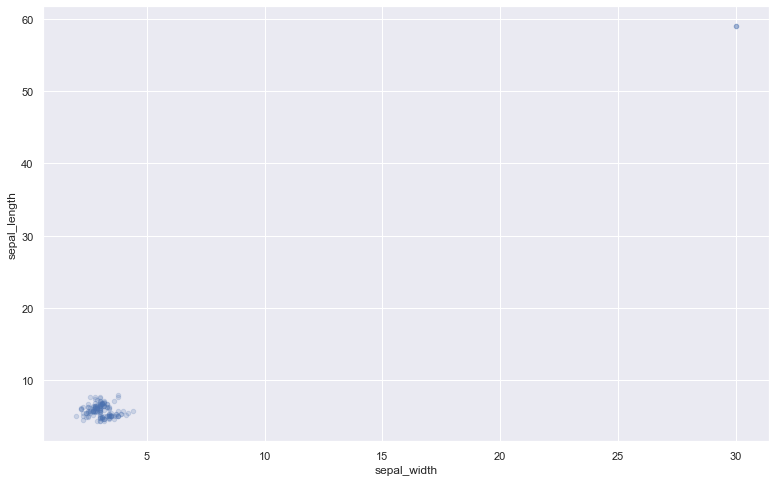

In [21]:
df.plot(kind='scatter', x='sepal_width', y='sepal_length', figsize=(13,8), alpha=0.2); 
#read this as kind - pick what plot type we want
# x and y - selecting the specific column for x and y axis
# figsize - looks like the size of the graph itself kinda like saying length of x and y
# alpha - making the points lighter in color so it is not as dark on the grid

<AxesSubplot:ylabel='Frequency'>

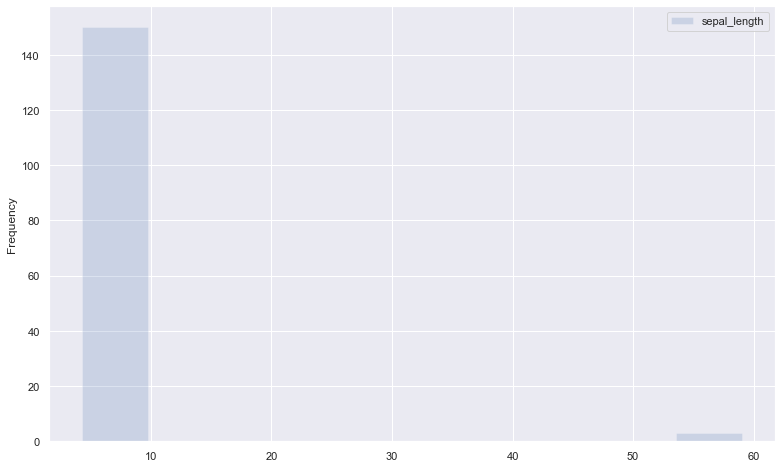

In [24]:
df.plot(kind='hist', x='sepal_width', y='sepal_length', figsize=(13,8), alpha=0.2) #trying out different ones

<AxesSubplot:ylabel='Density'>

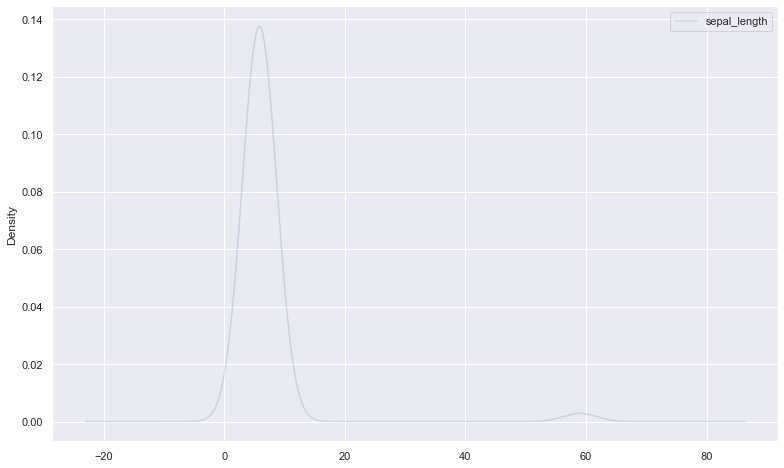

In [26]:
df.plot(kind='kde', x='sepal_width', y='sepal_length', figsize=(13,8), alpha=0.2) #KDE - kernel density estimation plot. 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


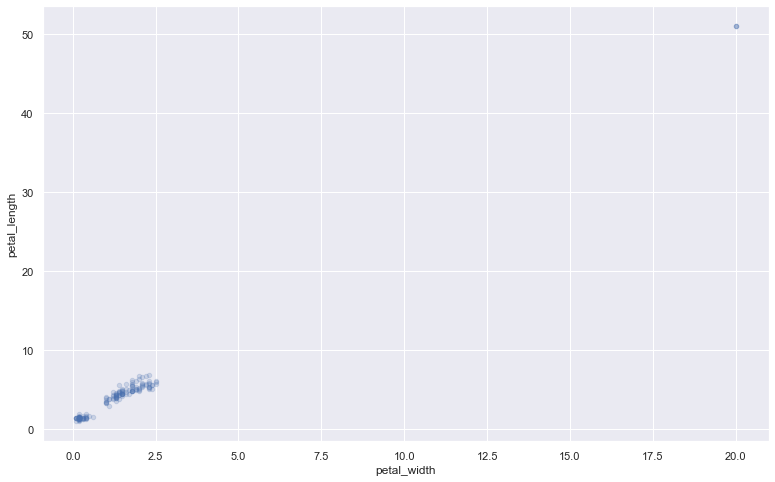

In [28]:
df.plot(kind='scatter', x='petal_width', y='petal_length', figsize=(13,8), alpha=0.2)

# How do we remove this outlier...?

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>

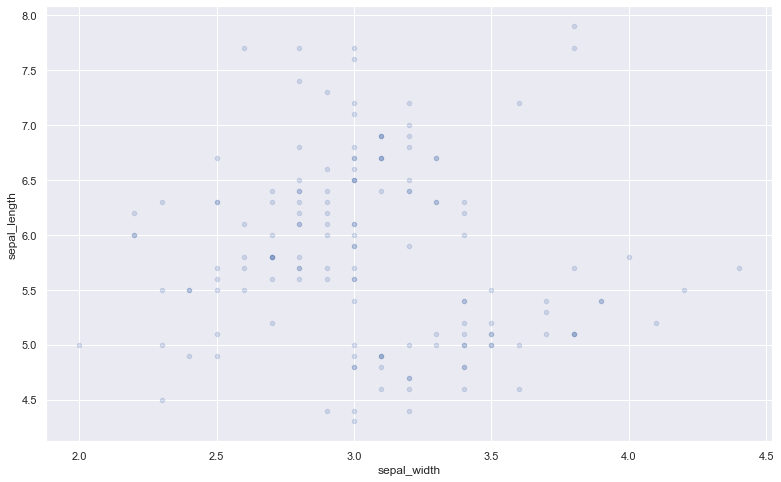

In [30]:
# Ask students to see if they can answer this. 
noout = df[(df['sepal_width'] < 20)] #condition to simply filter out and say we want the values to be less than twenty. 
noout.plot(kind='scatter', x='sepal_width', y='sepal_length', figsize=(13,8), alpha=0.2)

<AxesSubplot:>

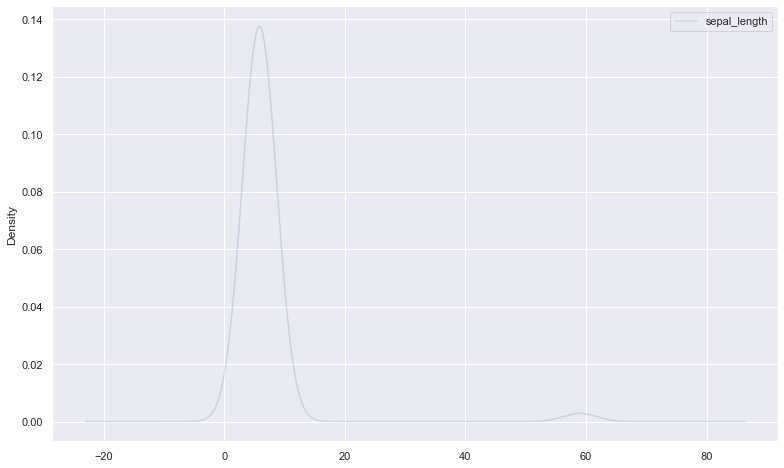

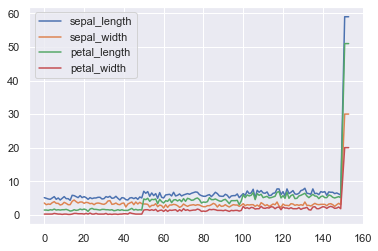

In [29]:
df.plot(kind='kde', x='sepal_width', y='sepal_length', figsize=(13,8), alpha=0.2)
df.plot() #general plotting


# More plotting.

In [ ]:
# How to remove the outlier...
select_condition = df.sepal_width < 20 #answer from before

df = df[select_condition]

df.plot(kind='scatter', x='petal_width', y='petal_length', figsize=(13,8))

# Bar Charts



In [32]:
gb = df.groupby('class')['sepal_length'].mean()
gb.head() #idea of what the values are

class
Iris-setosa        5.006000
Iris-versicolor    5.936000
Iris-virginica     9.554717
Name: sepal_length, dtype: float64

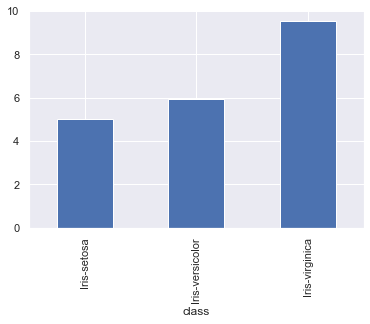

In [31]:
# Find the mean sepal_length for each of the classes 
gb = df.groupby('class')['sepal_length'].mean() #the classes are the iris-virginica, iris-versicolor, and iris-setosa. The actual values are the mean of sepal length of each class.

# Make a bar plot of said means
gb.plot(kind='bar')

# Histograms are great for finding what type of distribution the data is.

<AxesSubplot:ylabel='Frequency'>

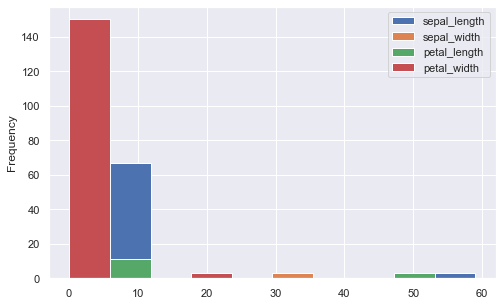

In [33]:
df.plot(kind='hist', bins=10, figsize=(8,5)) #bins is the number of seperate kinds of data pretty much

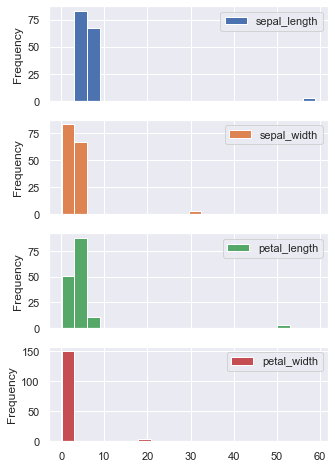

In [34]:
df.plot(bins=20, kind='hist', subplots=True, figsize=(5,8));

# Enter [Seaborn](https://seaborn.pydata.org/)
Seaborn is a visualization library that makes pretty plotting easy and fun. 
* Gallery of Examples:  https://seaborn.pydata.org/examples/index.html


### Scatter plots with Seaborn
* [Scatterplot Reference](https://seaborn.pydata.org/generated/seaborn.scatterplot.html#seaborn.scatterplot)

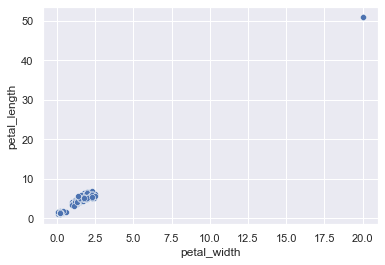

In [35]:
import seaborn as sns
# Dont forget to call sns.set()! 
sns.set()
# This tells the program to use the seaborn styles 
# Which make our graphs awesome looking


# Call using sns, and pass in the data frame.
ax = sns.scatterplot(data=df, x='petal_width', y='petal_length')

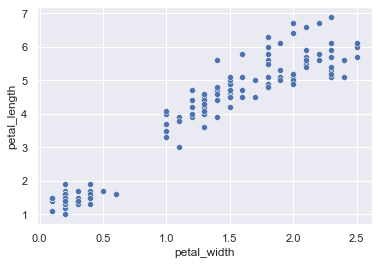

In [36]:
ax = sns.scatterplot(data=noout, x='petal_width', y='petal_length') #my df with NO outlier

### Seaborn plotting functions return an `axis` object aka `ax`, which you can then set chart options on. 
* All the options you can set using the axis object.
    * https://matplotlib.org/3.3.1/api/axes_api.html

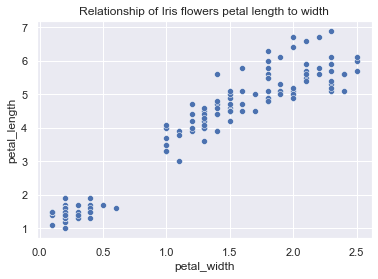

In [38]:
# ax = sns.scatterplot(data=df, x='petal_width', y='petal_length');
ax = sns.scatterplot(data=noout, x='petal_width', y='petal_length');

ax.set_title("Relationship of Iris flowers petal length to width"); #setting a title for the scatterplot

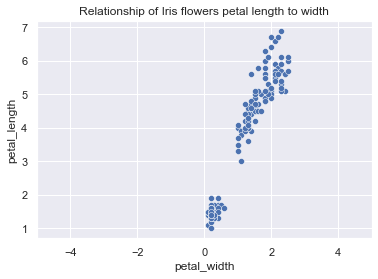

In [39]:
# Say you wanted to change the x-axis

# ax = sns.scatterplot(data=df, x='petal_width', y='petal_length');
ax = sns.scatterplot(data=noout, x='petal_width', y='petal_length'); #same
ax.set_title("Relationship of Iris flowers petal length to width"); #same
ax.set_xlim(left=-5, right=5); #set x limit. We change it so the x axis goes to -5 on left side and right side is 5.

In [40]:
df=noout #tired of doing this

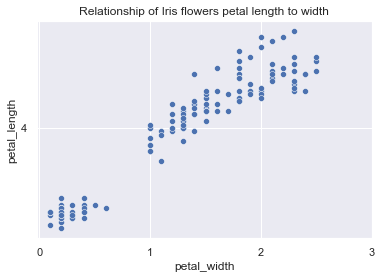

In [41]:
ax = sns.scatterplot(data=df, x='petal_width', y='petal_length');#same
ax.set_title("Relationship of Iris flowers petal length to width");#same idea
ax.set_xticks(ticks=[0,1,2,3]);#specifying the exact numbered tick
ax.set_yticks(ticks=[4]); #same here. So the top horizontal line is 8. The tick counts by 4.

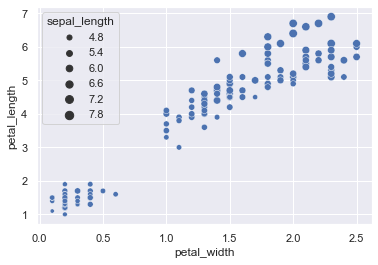

In [42]:
# Changing the size of the dots based on a column of our data.
sns.scatterplot(data=df, 
                x='petal_width', 
                y='petal_length',
                size='sepal_length'); #this is where we change size. Based on the sepal length. Larger sepal length, bigger the dot.

# What if we wanted to change the color of the markers based on the type of flower it is.
* Have students read documentation it to see if they can figure it out.
    * https://seaborn.pydata.org/generated/seaborn.scatterplot.html#seaborn.scatterplot


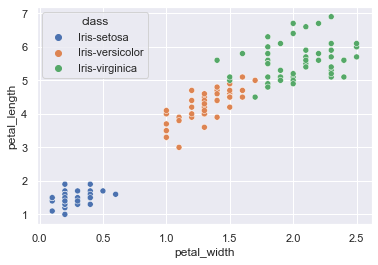

In [44]:
sns.scatterplot(data=df, 
                x='petal_width', 
                y='petal_length', 
                # ......................??? );
                hue='class'); #found this fcn called hue, group var produce points with differnt colors.

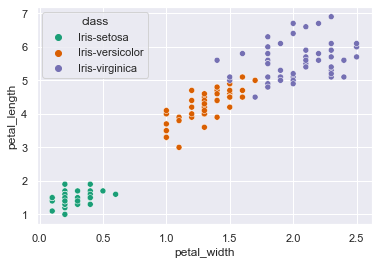

In [45]:
sns.scatterplot(data=df, #lecturer answer
                x='petal_width', 
                y='petal_length', 
                hue='class', 
                palette='Dark2');

# The super scatter plot

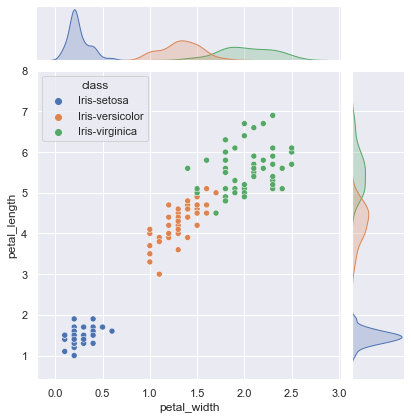

In [46]:
sns.jointplot(data=df, x='petal_width', y='petal_length', hue='class');

## Plotting the line of best fit
* Using `sns.regplot` and `sns.lmplot` you can easily plot regression analyses.

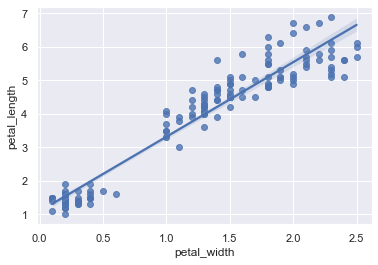

In [47]:
sns.regplot(data=df, x='petal_width', y='petal_length');

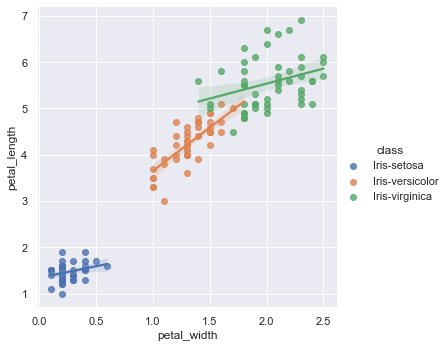

In [48]:
sns.lmplot(data=df, x='petal_width', y='petal_length', hue='class');

# Box Plots Are great for catching outliers
It can tell you about your outliers and what their values are. It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.

* Minimum = Q1 -1.5 * IQR 
* Q1 = median of lower half of data
* Q2 = median of data
* Q3 = median of upper half of data
* Maximum = Q3 + 1.5 * IQR
* IQR = Q3 - Q1


<img src='https://miro.medium.com/max/1400/1*2c21SkzJMf3frPXPAR_gZA.png' width=500>

In [49]:
df = pd.read_csv('data/iris.csv')

df = df.dropna() #rid of null values
df = df.drop_duplicates() #rid of duplicate values

df = df[df['sepal_width'] < 20] #removing outliers, specifying that the width is LESS THAN 20
df.head()


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


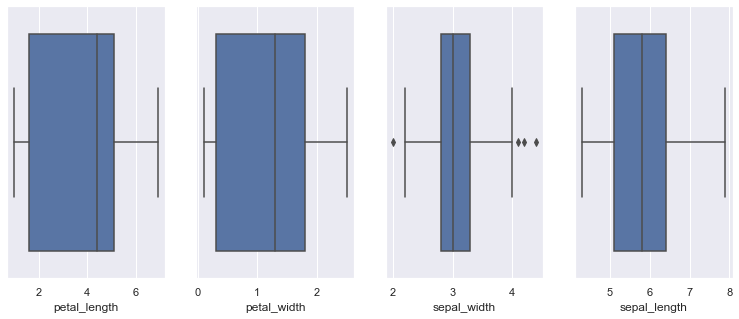

In [50]:
f, axes = plt.subplots(1, 4, figsize=(13,5)) #4 sub plots

ax = sns.boxplot(data=df, x='petal_length', ax=axes[0]);
ax = sns.boxplot(data=df, x='petal_width', ax=axes[1]);
ax = sns.boxplot(data=df, x='sepal_width', ax=axes[2]); #this one has outliers
ax = sns.boxplot(data=df, x='sepal_length', ax=axes[3]);

In [51]:
# Calculate Q1
Q1 = df['sepal_width'].quantile(0.25) #25th percentile

# Calculate Q3
Q3 = df['sepal_width'].quantile(0.75) #75th percentile

# Define the Inter Quartile Range (IQR)
IQR = Q3 - Q1

# Make select condition for the values that fall below the Q1 - 1.5*IQR
outliers_below = df['sepal_width'] < (Q1 - 1.5 * IQR)

# Make select condition for the values that fall above the Q3 - 1.5*IQR
outliers_above = df['sepal_width'] > (Q3 + 1.5 * IQR)

# Select the INVERSE of the selection
df = df[ ~(outliers_above | outliers_below) ] #inverse is the ~. Make dataFrame of anything NOT outliers above or below


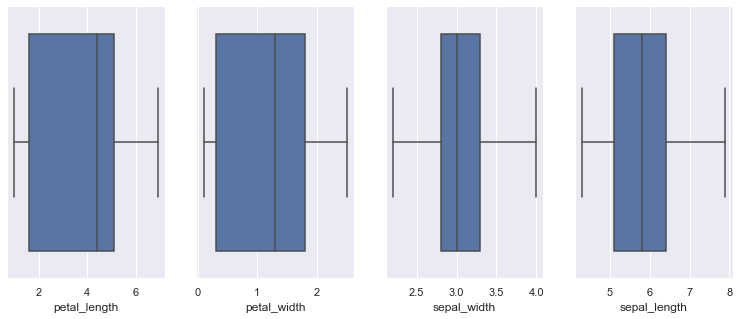

In [52]:
f, axes = plt.subplots(1, 4, figsize=(13,5)) #4 more subpplots

ax = sns.boxplot(data=df, x='petal_length', ax=axes[0]); #here we have no outliers
ax = sns.boxplot(data=df, x='petal_width', ax=axes[1]);
ax = sns.boxplot(data=df, x='sepal_width', ax=axes[2]); #this one had most significant impact sicne this had outliers before
ax = sns.boxplot(data=df, x='sepal_length', ax=axes[3]);

# The 'catch all' plotting function.

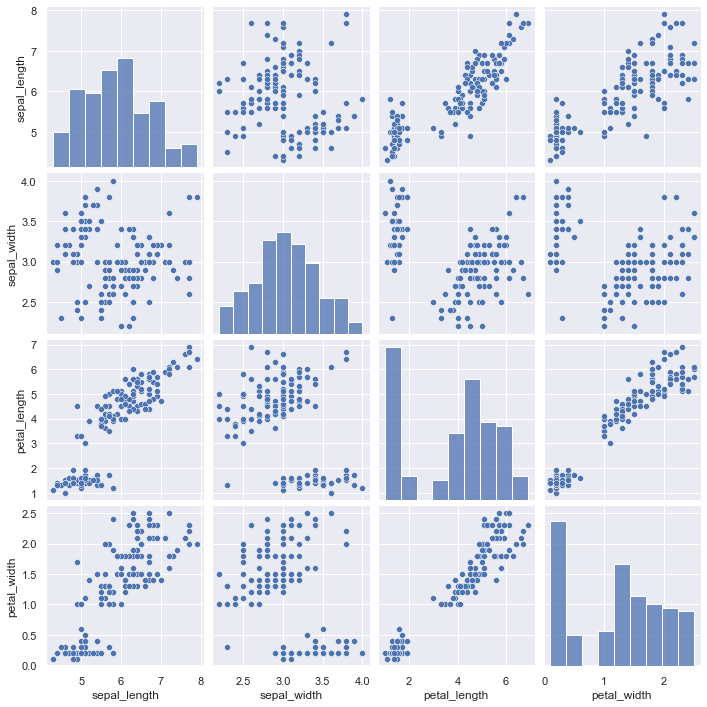

In [53]:
sns.pairplot(df); #correlation chart

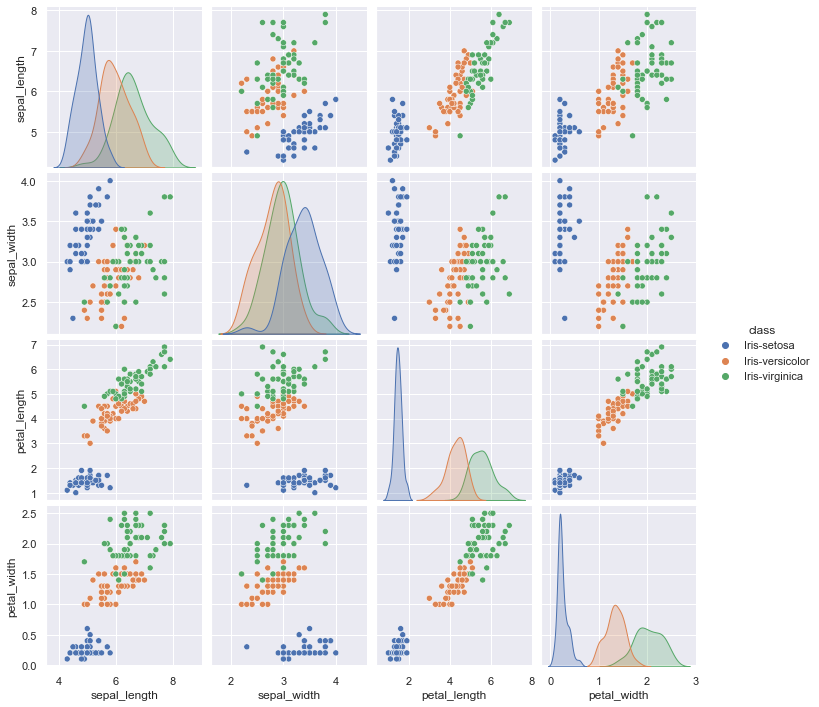

In [54]:
sns.pairplot(df, hue='class'); #easier to see

# Finding Correlations in your data.
In the broadest sense correlation is any statistical association, though it commonly refers to the degree to which a pair of variables are linearly related. [Learn more here](https://en.wikipedia.org/wiki/Correlation_and_dependence)

<img src='https://www.onlinemathlearning.com/image-files/correlation-coefficient.png' width=500>

In [55]:
# This functions finds the correlation between all numerical values.
df.corr() #1.0 is strong correlation. 1 is diagonal because it compares to each other. Sepal width and length havve NEGATIVE CORRELATION.

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.113268,0.879015,0.821715
sepal_width,-0.113268,1.000000,-0.396539,-0.328102
petal_length,0.879015,-0.396539,1.000000,0.960785
petal_width,0.821715,-0.328102,0.960785,1.000000


# Easily visualize your correlations with a heatmap.

<AxesSubplot:>

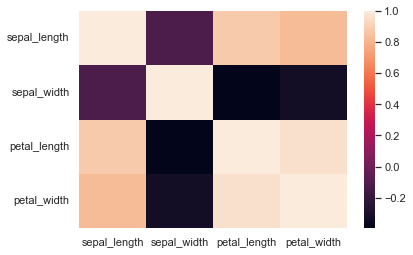

In [56]:
sns.heatmap(df.corr()) #visual 

<AxesSubplot:>

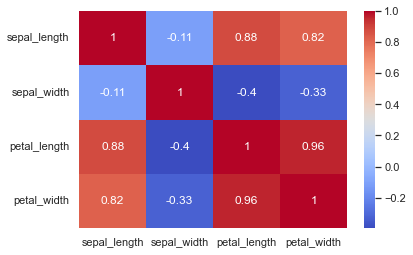

In [57]:
# sns.heatmap(df.corr(), annot=True, cmap='Spectral')
sns.heatmap(df.corr(), annot=True, cmap='coolwarm') #cmap changes color map


# Now it's time for you to practice some EDA. Open up the Exercise notebook and begin coding!

# Dont forget to update your fork
* Then Every week, run these commands.
	1. `git fetch upstream`
	2. `git merge upstream/master`